In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_df = pd.read_json('../data/section/json/train.json')
test_df = pd.read_json('../data/section/json/test.json')
full_df = pd.read_json('../data/section/json/full.json')

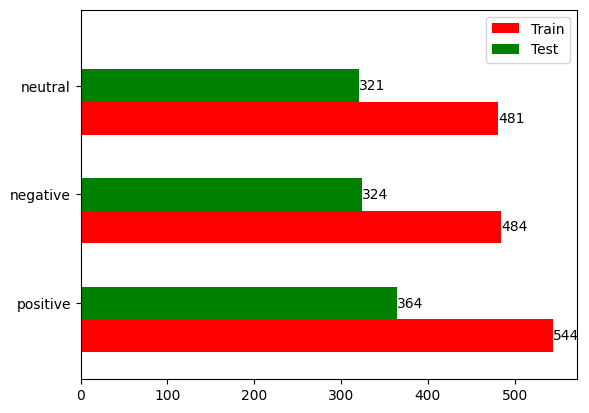

In [4]:
train_label_counts = train_df['label'].value_counts()
test_label_counts = test_df['label'].value_counts()

df = pd.DataFrame({'graph': train_label_counts.index,
                   'train': train_label_counts.values,
                   'test': test_label_counts.values})

width = 0.3
ind = np.arange(len(df))
fig, ax = plt.subplots()

train_bars = ax.barh(ind, df['train'], width, color='red', label='Train')
test_bars = ax.barh(ind + width, df['test'], width, color='green', label='Test')
ax.set(yticks=ind + width, yticklabels=df['graph'])
ax.set_ylim([2 * width - 1, len(df)])

for bar in train_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, width, ha='left', va='center')

for bar in test_bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, width, ha='left', va='center')

# sns.set_theme(palette="flare")
ax.legend()
plt.show()